<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#3/10/2023, Let's begin
import numpy as np
import matplotlib.pyplot as plt

$$First\; Problem$$

In [3]:
#upload the file in advance
im = plt.imread("AnalogScan.jpg", ".jpg")

In [5]:
print(im.shape)

(588, 468, 3)


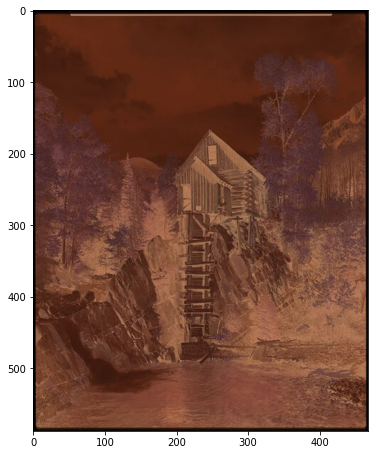

In [6]:
plt.figure(figsize = (6,10))
plt.imshow(im)
plt.show()

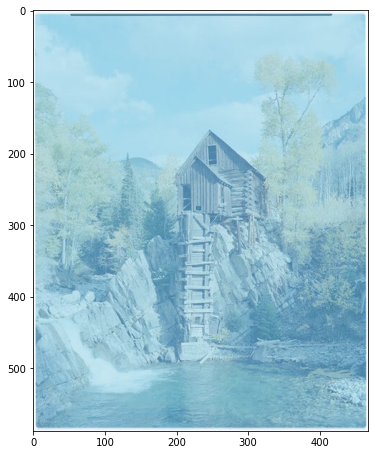

In [7]:
#3/13/2023 let's start again
neg = 255*np.ones(im.shape, dtype=int) -im
plt.figure(figsize = (6,10))
plt.imshow(neg)
plt.show()

In [9]:
#3/14/2023 an instance of matmul (tensor multiplication)
grayeq = neg@np.array([1/3,1/3,1/3])
graybetter = neg@np.array([0.2989,0.5870,0.114])

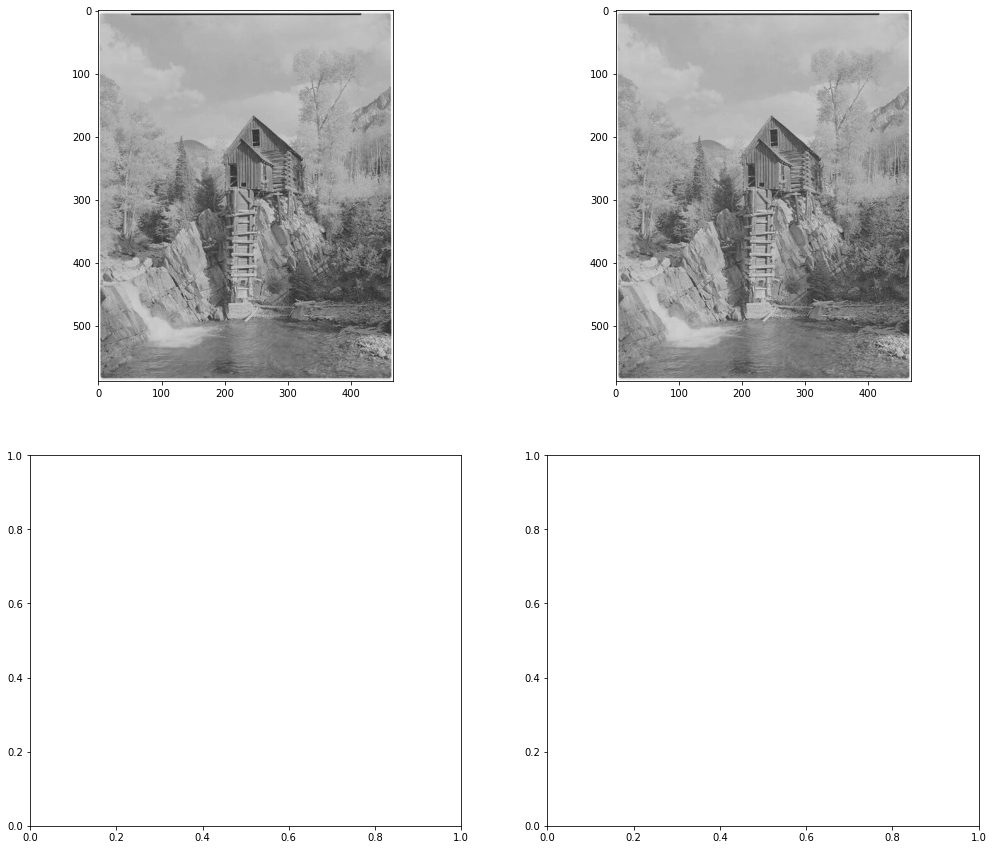

In [11]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(graybetter, cmap = 'gray')
axarr[0,1].imshow(grayeq, cmap = 'gray')
plt.show()

In [12]:
grayeq[359,40],graybetter[359,40] 
#as you can see, they're for sure different, but not that much!!

(145.33333333333331, 141.036)

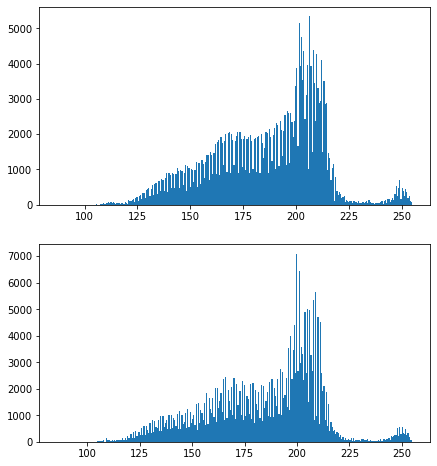

In [13]:
#3/15/2023
f, axarr = plt.subplots(2,figsize=(7,8))
axarr[0].hist(grayeq.flatten(), bins = 300)
axarr[1].hist(graybetter.flatten(), bins = 300)
plt.show()

In [15]:
#making the equalized output
a = np.rint(graybetter.flatten()).astype(int)
b = np.rint(grayeq.flatten()).astype(int)

cumbetter = np.cumsum(np.bincount(a)/np.sum(np.bincount(a)))
cumeq = np.cumsum(np.bincount(b)/np.sum(np.bincount(b)))

outputValueBetter = np.rint(cumbetter*255).astype(int)
outputValueEq = np.rint(cumeq*255).astype(int)

graybetterEq = np.zeros(graybetter.shape, dtype=int)
grayeqEq = np.zeros(grayeq.shape, dtype=int)


for i in range(graybetter.shape[0]):
  for j in range(graybetter.shape[1]):
    graybetterEq[i,j] = outputValueBetter[np.rint(graybetter[i,j]).astype(int)]

for i in range(grayeq.shape[0]):
  for j in range(grayeq.shape[1]):
    grayeqEq[i,j] = outputValueEq[np.rint(grayeq[i,j]).astype(int)]

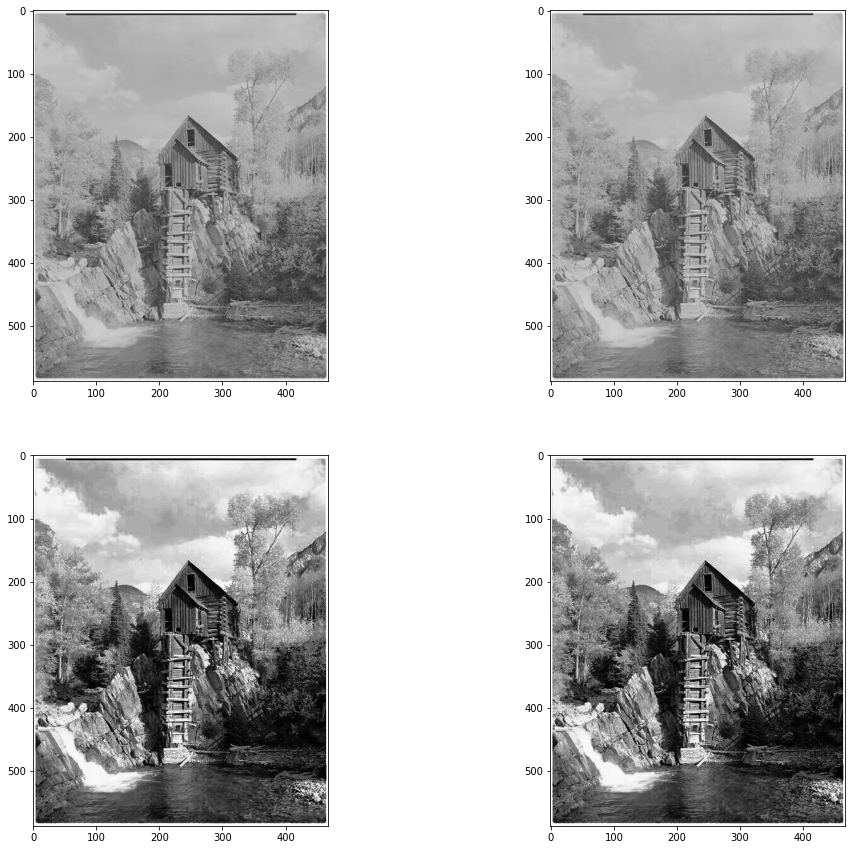

In [18]:
f, axarr = plt.subplots(2,2,figsize=(17,15))
axarr[0,0].imshow(graybetter, cmap = 'gray')
axarr[0,1].imshow(grayeq, cmap = 'gray')
axarr[1,0].imshow(graybetterEq, cmap = 'gray')
axarr[1,1].imshow(grayeqEq, cmap = 'gray')
plt.show()


$$Better\;is\;better\;:)$$

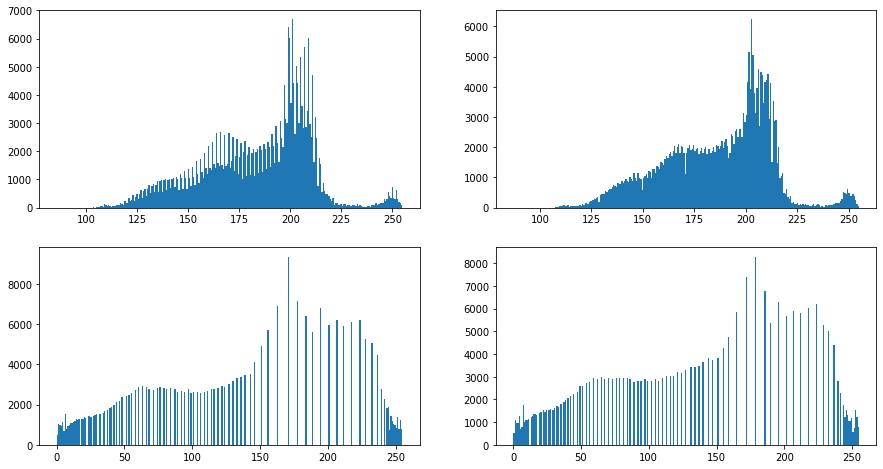

In [21]:
#3/15/2023
f, axarr = plt.subplots(2,2,figsize=(15,8))
axarr[0,0].hist(graybetter.flatten(), bins = 256)
axarr[0,1].hist(grayeq.flatten(), bins = 256)
axarr[1,0].hist(graybetterEq.flatten(), bins = 256)
axarr[1,1].hist(grayeqEq.flatten(), bins = 256)

plt.show()

$$Second\;Problem$$

In [23]:
#upload the file in advance
im2 = plt.imread("1008_IM-0009-2001.dcm.png", ".png")

In [24]:
print(im2.shape)

(2048, 2048, 4)


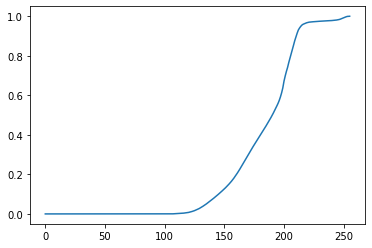

In [ ]:
# graybettereq 
# np.zeros((3,4,2))
plt.plot()

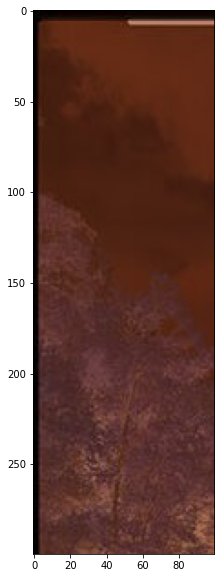

In [ ]:

plt.figure(figsize = (6,10))
plt.imshow(im[:300,:100,:])
plt.show()

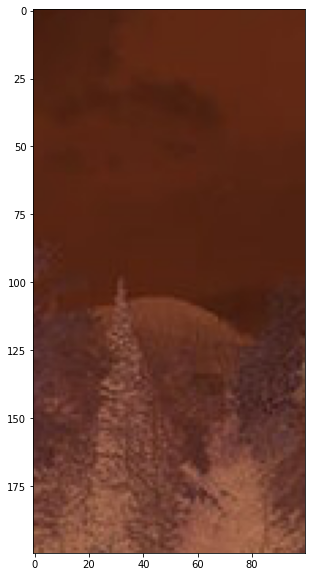

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[100:300,100:200,:])
plt.show()

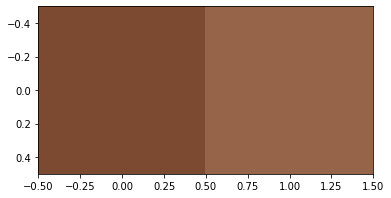

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(im[299:300,98:100,:])
plt.show()

In [ ]:
im[299:300,98:100,:]

array([[[124,  74,  49],
        [150, 100,  73]]], dtype=uint8)

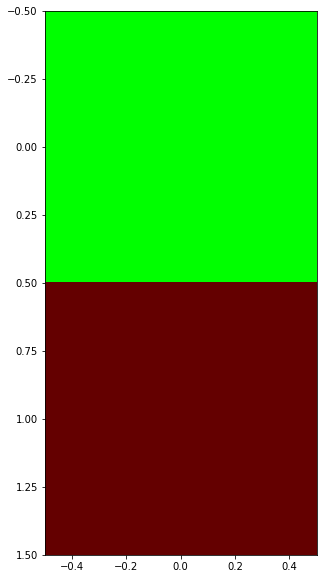

In [ ]:
plt.figure(figsize = (6,10))
plt.imshow(np.array([[[0, 255, 0]],[[100,0,0]]]))
plt.show()